# Exercise 01

In [1]:
#Create 3 classes: Student, DataSheet and Course
#A student has a data_sheet and a data_sheet has multiple courses in particular order
#Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
#In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
#In DataSheet create a method to get_grades_as_list()
#In student create a method: get_avg_grade()

class Student():
    """A Student contains some information about a student, and a DataSheep, which in turn contains information about Courses"""
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
    
    def __repr__(self):
        return 'Student(%r, %r, %r, %r)' % (self.name, self.gender, self.data_sheet, self.image_url)
    
    def get_avg_grade(self):
        grades = self.data_sheet.get_grades_as_list()
        return sum(grades)/len(grades)
    
    def get_study_progression(self):
        ects_points = 0
        for c in self.data_sheet.courses:
            ects_points += int(c.ECTS)
        progression_in_percent = ects_points/150*100
        return progression_in_percent
        

        
class DataSheet():
    """A DataSheet is a list of courses that a Student is assigned to"""
    def __init__(self, courses = []):
        self.courses = courses
        
    def __repr__(self):
        return 'DataSheet(%r)' % (self.courses)
    
    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            if course.grade is not None:
                grades.append(course)
        return grades
        
class Course():
    """A Course contains information about a course aswell as the grade a given student got in the course"""
    def __init__(self, name, classroom=None, teacher=None, ECTS=None, grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade
    
    def __repr__(self):
        return 'Course(%r,%r,%r,%r,%r)' % (self.name, self.classroom, self.teacher, self.ECTS, self.grade)

In [2]:
#Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
#Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
import random
import csv

names = ['Charlie', 'Finley', 'Skyler', 'Justice', 'Royal', 'Lennon', 'Oakley', 'Armani', 'Azariah', 'Landry']
genders = ['male', 'female']
courses = ['IoT', 'Fullstack JS', 'Python', 'Security']
grades = [-3, 0, 2, 4, 7, 10, 12]
img_urls = ['https://image.shutterstock.com/image-photo/portrait-asian-college-student-on-260nw-84518011.jpg', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLv0JzGytms1buAcaOKfIUFmKzzWJ3B2FBXA&usqp=CAU']
ects = [5,10,15,20,25,30,35,40]
teacher_names = ['Thomas', 'Lars', 'Tobias']
classrooms = ['cr1', 'cr2', 'cr3']
def create_random_students(n):
    students = []
    for x in range(n):
        # Laver Courses
        student_courses = []
        #course_names er et set så vi får 3 unikke navne
        course_names = set()
        while (len(course_names) < 3):
            course_name = random.choice(courses)
            course_names.add(course_name)
        for c in course_names:
            course = Course(c, random.choice(classrooms), random.choice(teacher_names), random.choice(ects), random.choice(grades))
            student_courses.append(course)
        
        #Laver DataSheet
        data_sheet = DataSheet(student_courses)
        
        #Laver Student
        s_name = random.choice(names)
        #Bliver nødt til at remove når et name bliver brugt, ellers kan vi få dublicate names og de fungerer som key
        names.remove(s_name)
        s_gender = random.choice(genders)
        s_img_url = random.choice(img_urls)
        student = Student(s_name, s_gender, data_sheet, s_img_url)
        students.append(student)
    with open('students.csv', 'w', newline = '') as result_file:
        header = ['stud_name', 'course_name', 'teacher', 'ects', 'classroom', 'grade', 'img_url']
        writer = csv.DictWriter(result_file, fieldnames = header)
        writer.writeheader()
        for student in students:
            for c in student.data_sheet.courses:
                writer.writerow({'stud_name':student.name, 'course_name': c.name,
                                 'teacher':c.teacher, 'ects':c.ECTS, 'classroom':c.classroom,
                                 'grade':c.grade, 'img_url':student.image_url})
    return students

students = create_random_students(3)

for s in students:
    print(s.get_study_progression())
    

50.0
63.33333333333333
50.0


In [3]:
#Read student data into a list of Students from a csv file:
import csv

def read_students_from_csv():
    """lidt kringlet metode, kan nok laves bedre. Jeg læser først alle linjerne ud som hver deres student,
    så tager jeg alle unikke navne ud i et set og laver så en ny liste af students hvor de hver kun står en gang,
    men har alle deres course"""
    students = []
    with open('students.csv') as f:
        reader = csv.reader(f)
        header_row = next(reader)
        
        for row in reader:
            #laver course
            c_name = row[1]
            teacher = row[2]
            ects = row[3]
            classroom = row[4]
            grade = int(row[5])
            course = Course(c_name, classroom, teacher, ects, grade)
            #laver data sheet
            courses = [course]
            data_sheet = DataSheet(courses)
            #laver student
            s_name = row[0]
            s_img_url = row[6]
            student = Student(s_name, 'uknown', data_sheet, s_img_url)
            students.append(student)
    s_names = set([student.name for student in students])
    s_result = []
    for name in s_names:
        courses = []
        s_name = ''
        s_img_url = ''
        for s in students:
            if name == s.name:
                courses += s.data_sheet.courses
                s_name = s.name
                s_img_url = s.image_url
        ds_result = DataSheet(courses)
        student_result = Student(s_name, 'uknown', ds_result, s_img_url)
        s_result.append(student_result)
    return s_result
    
        
    
read_students_from_csv()

[Student('Royal', 'uknown', DataSheet([Course('Python','cr1','Thomas','5',7), Course('IoT','cr3','Thomas','30',2), Course('Fullstack JS','cr3','Thomas','40',12)]), 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU'),
 Student('Azariah', 'uknown', DataSheet([Course('Python','cr2','Thomas','30',4), Course('Security','cr3','Tobias','40',10), Course('IoT','cr3','Tobias','25',2)]), 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLv0JzGytms1buAcaOKfIUFmKzzWJ3B2FBXA&usqp=CAU'),
 Student('Lennon', 'uknown', DataSheet([Course('Python','cr3','Tobias','40',12), Course('IoT','cr2','Tobias','5',-3), Course('Fullstack JS','cr1','Tobias','30',-3)]), 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU')]

In [4]:
#loop through the list and print each student with name, img_url and avg_grade.
students_from_csv = read_students_from_csv()
avg_grade_list = []
for s in students_from_csv:
    grade_total = 0
    for c in s.data_sheet.courses:
        grade_total += int(c.grade)
    avg_grade = grade_total/len(s.data_sheet.courses)
    avg_grade_list.append((s.name, s.image_url, avg_grade))
    print('name : ' + s.name + ', img_url : ' + s.image_url + ' , average grade : ' + str(avg_grade))
    
#sort the list by avg_grade
students_sorted_by_grade = sorted(avg_grade_list, key=lambda student: student[2], reverse=True)
print(students_sorted_by_grade)

name : Royal, img_url : https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU , average grade : 7.0
name : Azariah, img_url : https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLv0JzGytms1buAcaOKfIUFmKzzWJ3B2FBXA&usqp=CAU , average grade : 5.333333333333333
name : Lennon, img_url : https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU , average grade : 2.0
[('Royal', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU', 7.0), ('Azariah', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTLv0JzGytms1buAcaOKfIUFmKzzWJ3B2FBXA&usqp=CAU', 5.333333333333333), ('Lennon', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcToo2M6jRIaCoC3CrVqSdcfG8EQNkGkXwCVRQ&usqp=CAU', 2.0)]


<IPython.core.display.Javascript object>


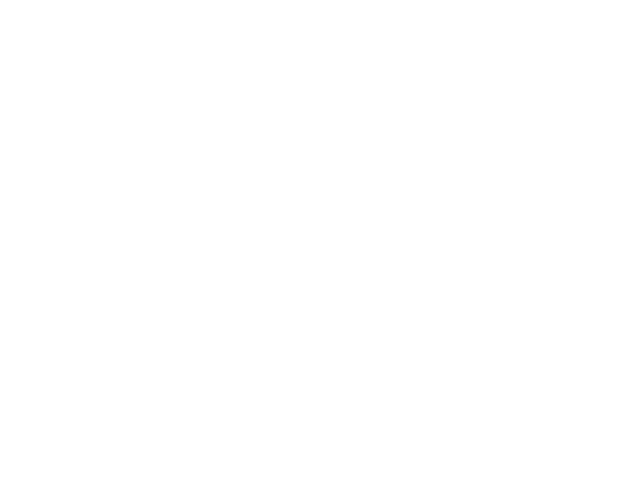

In [5]:
#create a bar chart with student_name on x and avg_grade on y-axis
%matplotlib notebook
import matplotlib.pyplot as plt

names = []
avg_grades = []

for s in avg_grade_list:
    names.append(s[0])
    avg_grades.append(s[2])

max_y_val = max(avg_grades)
plt.bar(names, avg_grades, width=0.5, align='center')
title = 'Average grade of students'
plt.title(title, fontsize=12)
plt.xlabel('Names', fontsize=10)
plt.ylabel('Avg Grade', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

[0, 0, 0, 0, 2, 0, 1, 0, 0, 0]


<IPython.core.display.Javascript object>


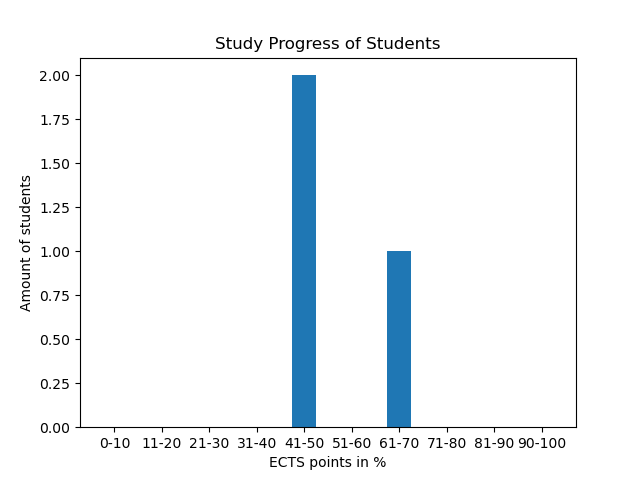

In [9]:
#Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)
%matplotlib notebook
import matplotlib.pyplot as plt

study_progress = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90-100']


p1 = 0
p2 = 0
p3 = 0
p4 = 0
p5 = 0
p6 = 0
p7 = 0
p8 = 0
p9 = 0
p10 = 0

for s in students_from_csv:
    prog = s.get_study_progression()
    if prog <= 10:
        p1 += 1
    elif prog >= 11 and prog <=20:
        p2 += 1
    elif prog >= 21 and prog <=30:
        p3 += 1
    elif prog >= 31 and prog <=40:
        p4 += 1
    elif prog >= 41 and prog <=50:
        p5 += 1
    elif prog >= 51 and prog <=60:
        p6 += 1
    elif prog >= 61 and prog <=70:
        p7 += 1
    elif prog >= 71 and prog <=80:
        p8 += 1
    elif prog >= 81 and prog <=90:
        p9 += 1
    elif prog >= 91:
        p10 += 1

amount_of_students = [p1, p2,p3,p4,p5,p6,p7,p8,p9,p10]
print(amount_of_students)


plt.bar(study_progress, amount_of_students, width=0.5, align='center')
title = 'Study Progress of Students'
plt.title(title, fontsize=12)
plt.xlabel('ECTS points in %', fontsize=10)
plt.ylabel('Amount of students', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)